In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./seoul.csv', encoding = 'cp949')
df

,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차
0,서울,1907-10-01,13.5,20.7,7.9,12.8
1,서울,1907-10-02,16.2,22.0,7.9,14.1
2,서울,1907-10-03,16.2,21.3,13.1,8.2
3,서울,1907-10-04,16.5,22.0,11.2,10.8
4,서울,1907-10-05,17.6,25.4,10.9,14.5
...,...,...,...,...,...,...
41283,서울,2021-12-15,7.2,10.0,5.4,4.6
41284,서울,2021-12-16,6.4,9.8,3.3,6.5
41285,서울,2021-12-17,-5.6,3.2,-10.1,13.3
41286,서울,2021-12-18,-5.7,-1.8,-11.2,9.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41288 entries, 0 to 41287
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      41288 non-null  object 
 1   일시       41288 non-null  object 
 2   평균기온(℃)  40532 non-null  float64
 3   최고기온(℃)  40529 non-null  float64
 4   최저기온(℃)  40530 non-null  float64
 5   일교차      40529 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.9+ MB


In [4]:
df['일시'] = pd.to_datetime(df['일시'])

# 기상 관측 이래, 서울의 최고 기온이 가장 높았던 날은?

In [5]:
max_temp = df['최고기온(℃)'].max()
max_temp

39.6

In [6]:
for i in range(len(df)):
    if df['최고기온(℃)'][i] == max_temp:
        max_date =df['일시'][i]
max_date

Timestamp('2018-08-01 00:00:00')

In [7]:
print('기상 관측 이래 서울의 최고 기온이 가장 높았던 날은', max_date, '로,', max_temp, '도 였습니다.')

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 2018-08-01 00:00:00 로, 39.6 도 였습니다.


# 크리스마스의 기온 변화

In [8]:
result = df[(df['일시'].dt.month == 12) & (df['일시'].dt.day == 25)].reset_index(drop = True)
result

,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차
0,서울,1907-12-25,3.5,6.8,1.1,5.7
1,서울,1908-12-25,-0.3,6.3,-6.6,12.9
2,서울,1909-12-25,-9.9,-6.0,-12.5,6.5
3,서울,1910-12-25,-0.5,0.6,-4.1,4.7
4,서울,1911-12-25,-1.8,0.7,-5.4,6.1
...,...,...,...,...,...,...
108,서울,2016-12-25,1.0,6.4,-4.5,10.9
109,서울,2017-12-25,-2.1,0.6,-4.9,5.5
110,서울,2018-12-25,0.6,5.2,-4.0,9.2
111,서울,2019-12-25,2.0,6.6,-2.7,9.3


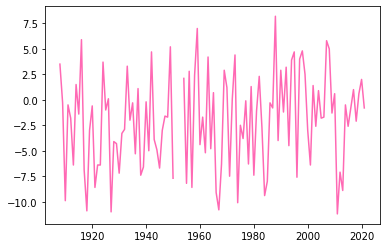

In [9]:
plt.plot(result['일시'], result['평균기온(℃)'], 'hotpink')
plt.show()

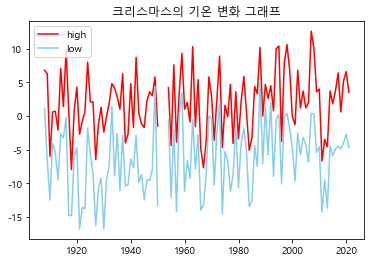

In [11]:
plt.plot(result['일시'], result['최고기온(℃)'], 'r', label = 'high')
plt.plot(result['일시'], result['최저기온(℃)'], 'skyblue', label = 'low')
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'     # 한글 폰트
plt.title('크리스마스의 기온 변화 그래프')
plt.legend()     # 범례 표시
plt.show()

# 기온 데이터의 다양한 시각화

#### 1907년 ~ 2021년까지의 최고기온을 히스토그램으로 표현

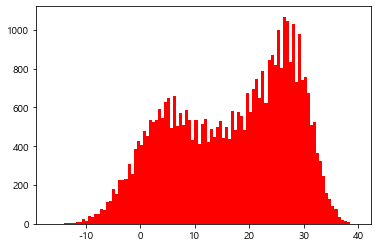

In [12]:
plt.hist(df['최고기온(℃)'], bins = 100, color = 'r')
plt.show()

#### 8월의 최고기온만 히스토그램으로 표현

In [13]:
aug = df[df['일시'].dt.month == 8].reset_index(drop = True)
aug

,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차
0,서울,1908-08-01,26.2,29.6,24.4,5.2
1,서울,1908-08-02,26.4,30.7,23.3,7.4
2,서울,1908-08-03,26.9,32.0,24.2,7.8
3,서울,1908-08-04,26.3,31.5,22.6,8.9
4,서울,1908-08-05,27.3,32.4,23.6,8.8
...,...,...,...,...,...,...
3467,서울,2021-08-27,22.4,25.5,20.4,5.1
3468,서울,2021-08-28,23.6,28.2,19.7,8.5
3469,서울,2021-08-29,23.7,26.3,21.9,4.4
3470,서울,2021-08-30,24.2,27.7,21.2,6.5


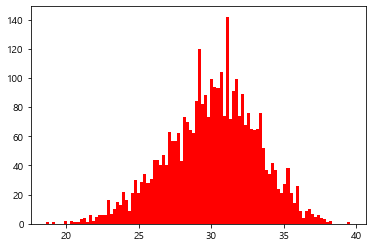

In [14]:
plt.hist(aug['최고기온(℃)'], bins = 100, color = 'r')
plt.show()

- 역대 8월에는 최고기온이 28도 ~ 32도 정도가 가장 많음
- 8월 최고기온이 20도 이하이거나 40도 이상인 경우는 거의 없음

#### 1월과 8월의 최고기온을 히스토그램으로 표현

In [15]:
jan = df[df['일시'].dt.month == 1].reset_index(drop = True)
jan

,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차
0,서울,1908-01-01,-5.9,-1.3,-9.1,7.8
1,서울,1908-01-02,-7.7,-3.0,-13.9,10.9
2,서울,1908-01-03,-6.2,-2.9,-10.8,7.9
3,서울,1908-01-04,-7.5,-1.7,-12.8,11.1
4,서울,1908-01-05,-4.8,-0.1,-11.3,11.2
...,...,...,...,...,...,...
3498,서울,2021-01-27,1.7,6.5,-1.8,8.3
3499,서울,2021-01-28,-2.6,1.4,-9.7,11.1
3500,서울,2021-01-29,-8.8,-4.9,-11.6,6.7
3501,서울,2021-01-30,-1.6,5.2,-8.1,13.3


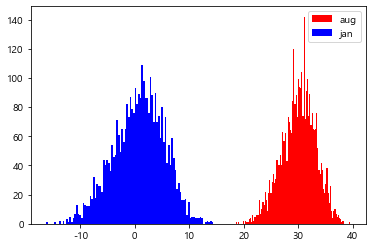

In [16]:
plt.hist(aug['최고기온(℃)'], bins = 100, color = 'r', label = 'aug')
plt.hist(jan['최고기온(℃)'], bins = 100, color = 'b', label = 'jan')
plt.legend()
plt.show()

#### 서울의 최고기온을 상자그림으로 표현

In [37]:
import csv
f = open('seoul.csv')
data = csv.reader(f)
next(data)

['지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차']

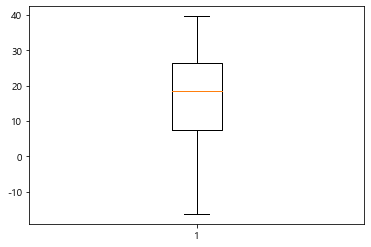

In [41]:
import csv
f = open('seoul.csv')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-3] != '':
        result.append(float(row[-3]))
        
import matplotlib.pyplot as plt
plt.boxplot(result)
plt.show()

In [42]:
# 1/4, 2/4, 3/4에 위치한 정확한 값 확인
print('1/4: ' + str(np.percentile(result, 25)))
print('2/4: ' + str(np.percentile(result, 50)))
print('3/4: ' + str(np.percentile(result, 75)))

1/4: 7.3
2/4: 18.6
3/4: 26.3


#### 1월과 8월 최고기온의 상자그림

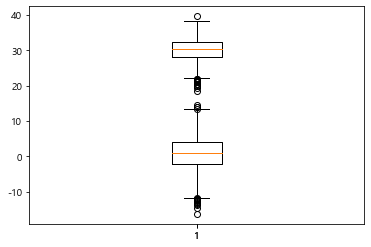

In [43]:
import csv
f = open('seoul.csv')
data = csv.reader(f)
next(data)
aug = []
jan = []

for row in data:
    month = row[1].split('-')[1]
    if row[-3] != '':
        if month == '08':
            aug.append(float(row[-3]))
        elif month == '01':
            jan.append(float(row[-3]))
            
import matplotlib.pyplot as plt
plt.boxplot(aug)
plt.boxplot(jan)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26cef26ea08>,
 'caps': [<matplotlib.lines.Line2D at 0x26cece68a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x26cef26eac8>,
 'medians': [<matplotlib.lines.Line2D at 0x26cef26ea88>,
 'fliers': [<matplotlib.lines.Line2D at 0x26cedbf40c8>,
 'means': []}

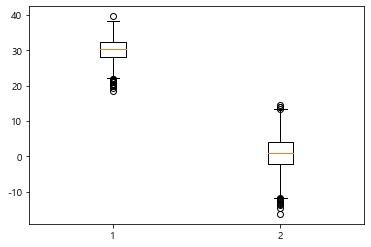

In [44]:
plt.boxplot([aug, jan])

#### 월별 최고 기온 데이터 비교

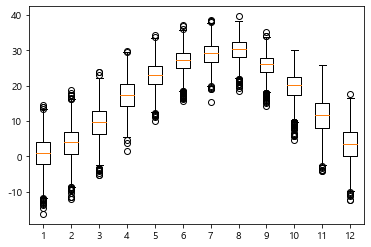

In [47]:
import csv
f = open('seoul.csv')
data = csv.reader(f)
next(data)

# 월별 데이터를 저장할 리스트 생성
month = [[], [], [], [], [], [], [], [], [], [], [], []]

for row in data:
    if row[-3] != '':
        # 월과 같은 번호의 인덱스에 월별 데이터 저장
        month[int(row[1].split('-')[1]) - 1].append(float(row[-3]))
        
import matplotlib.pyplot as plt
plt.boxplot(month)
plt.show()

- 위 결과를 확인해보면 8월의 최고기온이 가장 덥고, 1월의 최고기온이 가장 낮다

#### 8월 중 가장 더운 날은? 8월의 일별 기온 데이터를 상자그림으로 표현

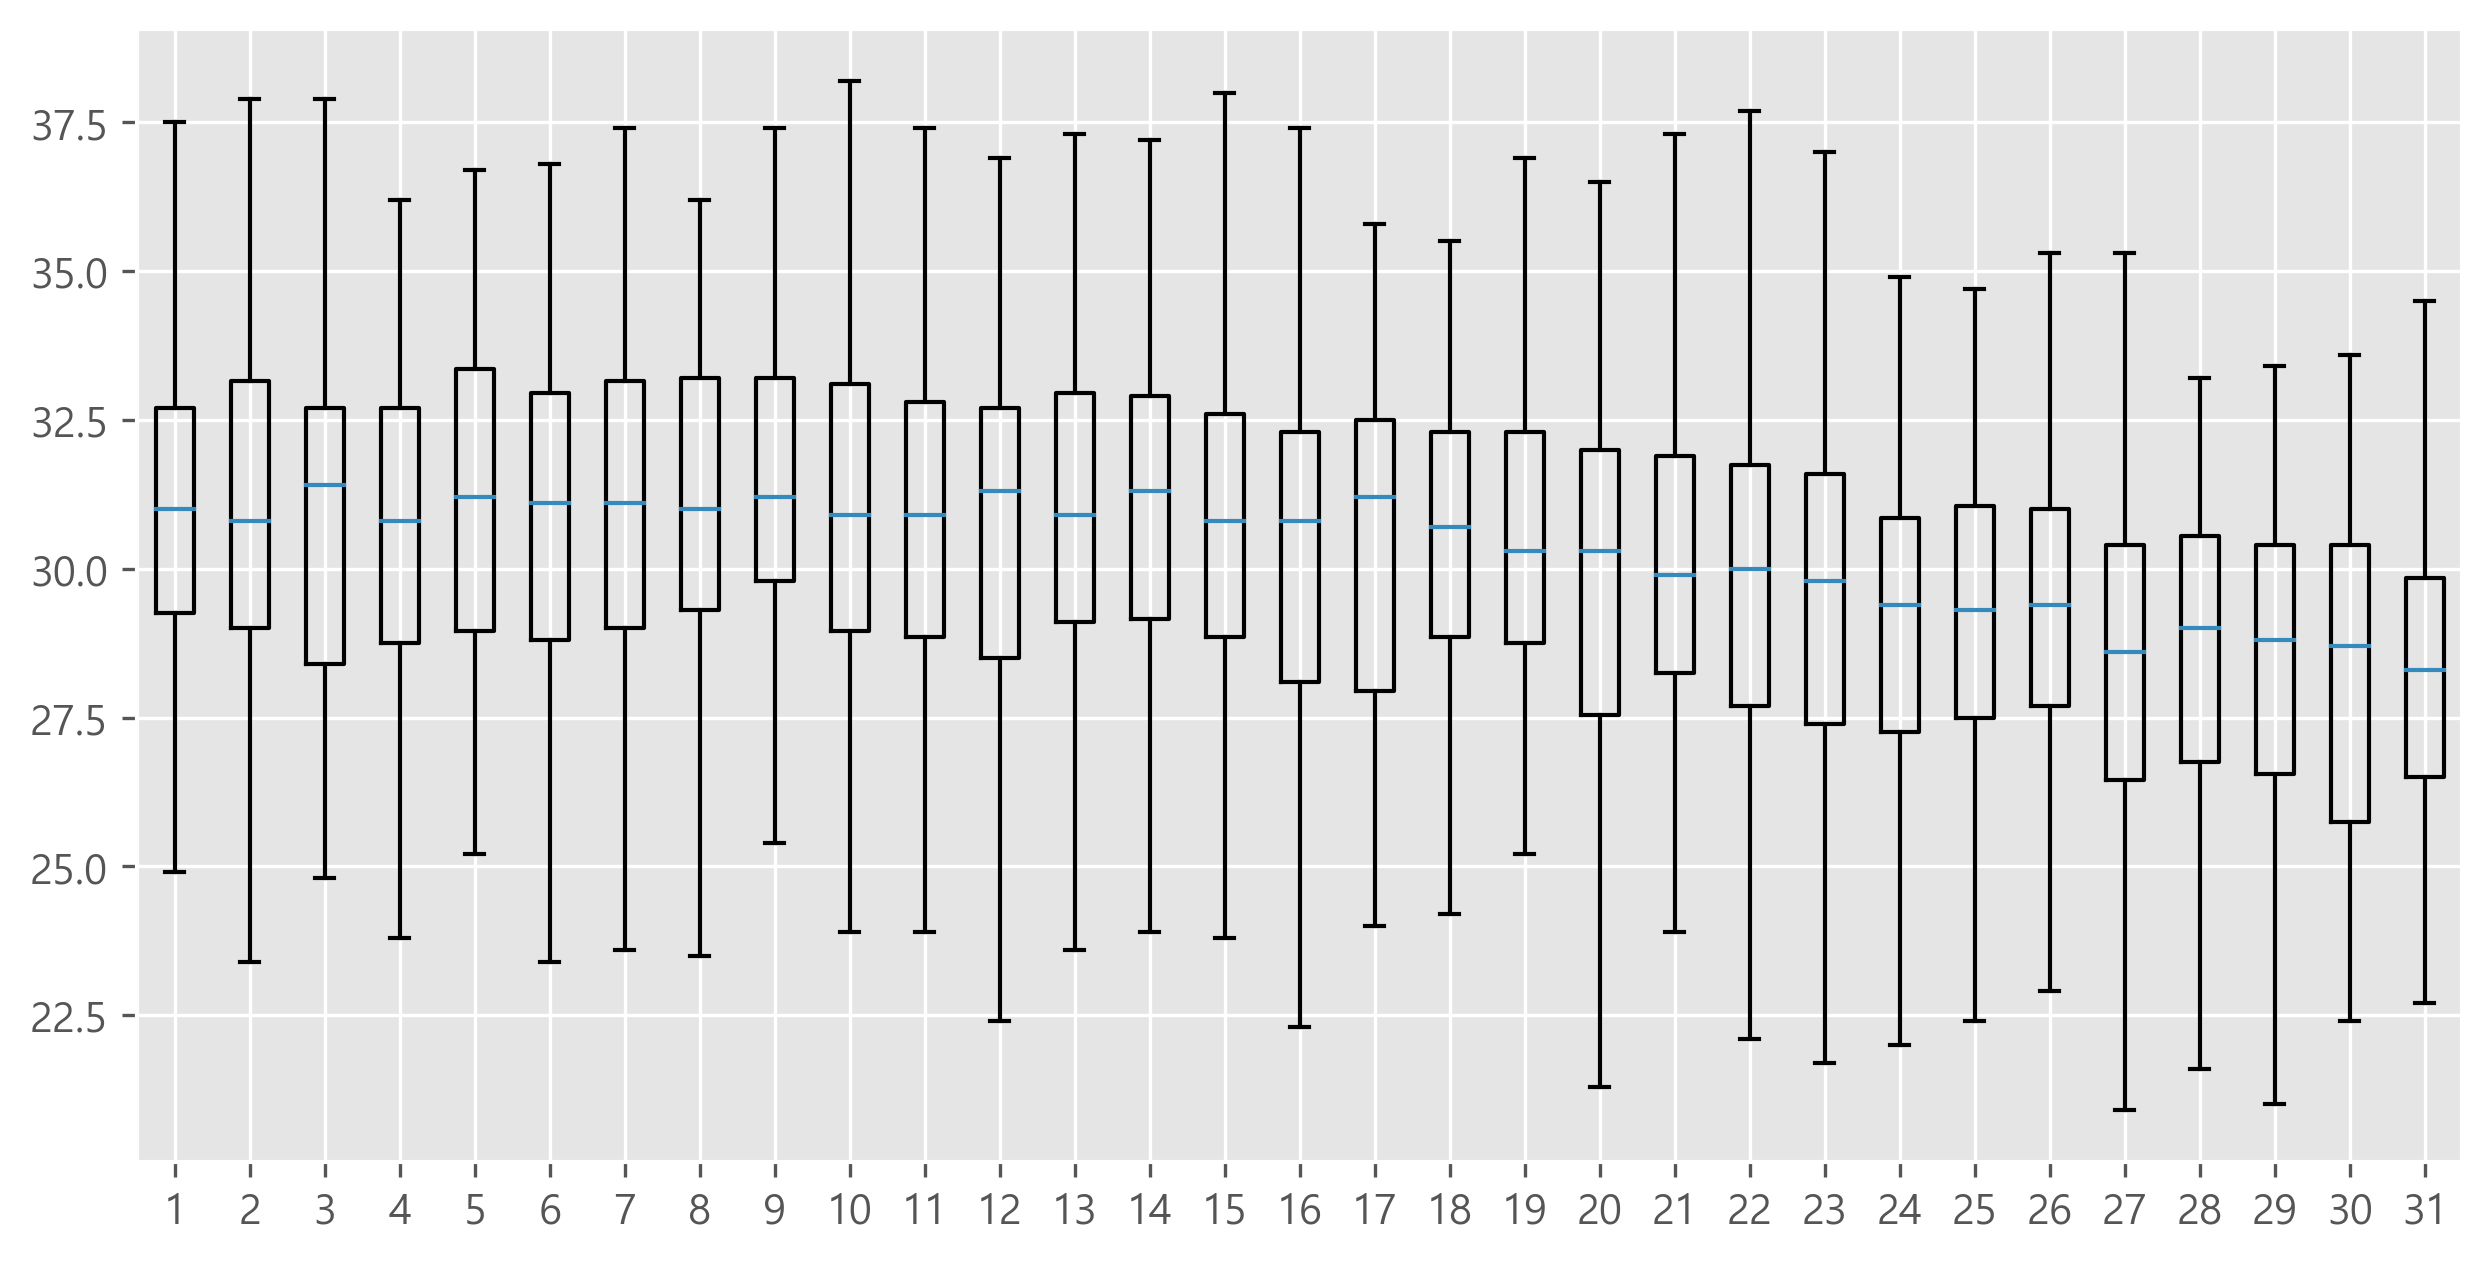

In [48]:
import csv
f = open('seoul.csv')
data = csv.reader(f)
next(data)

day = []     # 일별 데이터를 저장할 리스트 생성
for i in range(31):
    day.append([])     # day리스트 내에 31개의 리스트 생성
    
for row in data:
    if row[-3] != '':
        if row[1].split('-')[1] == '08':     # 8월
            # 최고기온 값 day에 저장
            day[int(row[1].split('-')[2]) - 1].append(float(row[-3]))
            
import matplotlib.pyplot as plt
plt.style.use('ggplot')     # 그래프 스타일 지정(회색 격자 무늬, 2/4값을 의미하는 선의 색 파랑)
plt.figure(figsize = (10, 5), dpi = 300)     # 그래프 크기 수정
plt.boxplot(day, showfliers = False)     # 아웃라이어 생략
plt.show()